# What's Cooking?

Use recipe ingredients to categorize the cuisine. 

## Import Libraries

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import zipfile
import math
sb.set()

## Data Preparation

### Extract dataset

Extract train.json from zipfile and peek using head function. 

In [2]:
train_file = zipfile.ZipFile('train.json.zip', 'r')
train_data = pd.read_json(train_file.read('train.json'))
train_data.head()

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39774 entries, 0 to 39773
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           39774 non-null  int64 
 1   cuisine      39774 non-null  object
 2   ingredients  39774 non-null  object
dtypes: int64(1), object(2)
memory usage: 932.3+ KB


id is read as integers.
cuisine and ingredients are read as objects.
The columns with object dtype are the possible categorical features in dataset.

### Filter categorical data and check for null values in the dataset

In [4]:
cat_train_data = train_data.select_dtypes(include=['object']).copy()
cat_train_data.head()

,cuisine,ingredients
0,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,indian,"[water, vegetable oil, wheat, salt]"
4,indian,"[black pepper, shallots, cornflour, cayenne pe..."


In [5]:
print("The dataset has", cat_train_data.isnull().values.sum(), "null value(s).")

The dataset has 0 null value(s).


### Prepare the data so that the dataset is in the proper format

In [6]:
cuisine_dict_count = {} # Initialize an empty dictionary for cuisines
for c_count in train_data['cuisine']:
    if c_count in cuisine_dict_count.keys():
        cuisine_dict_count[c_count] += 1
        # Increment the count by 1
    else:
        cuisine_dict_count[c_count] = 1

In [7]:
print('There are', len(cuisine_dict_count), 'types of cuisines in total, which are', list(cuisine_dict_count.keys()),'.')

There are 20 types of cuisines in total, which are ['greek', 'southern_us', 'filipino', 'indian', 'jamaican', 'spanish', 'italian', 'mexican', 'chinese', 'british', 'thai', 'vietnamese', 'cajun_creole', 'brazilian', 'french', 'japanese', 'irish', 'korean', 'moroccan', 'russian'] .


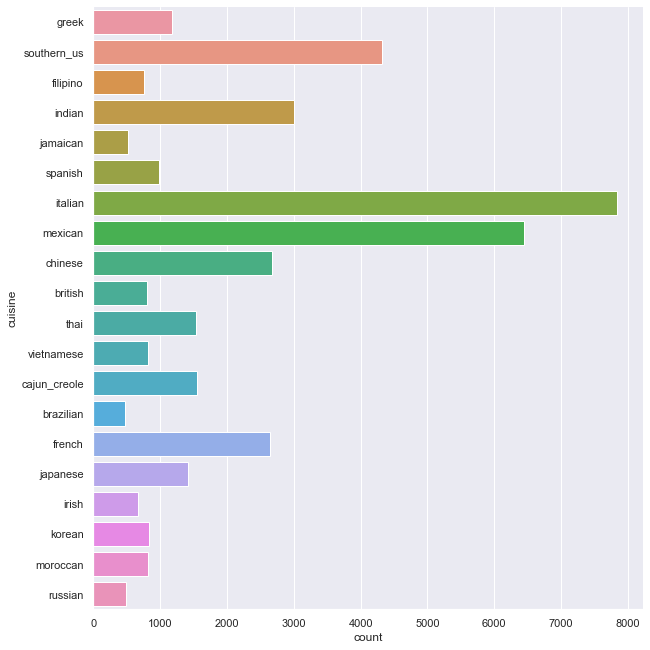

In [8]:
sb.catplot(y='cuisine', data = cat_train_data, kind = 'count', height = 9)

In [9]:
ingredient_dict_count = {} # Initialize an empty dictionary for ingredients
for b in train_data['ingredients']: # b is a set of ingredients for each cuisine
    for a in b:
        # a is an ingredient from the given set of ingredients
        if a in ingredient_dict_count.keys():
            ingredient_dict_count[a] += 1
            # Increment the count by 1
        else:
            ingredient_dict_count[a] = 1

In [10]:
print("There are", len(ingredient_dict_count), "types of ingredients in total.")

There are 6714 types of ingredients in total.


In [11]:
for e in ingredient_dict_count.keys():
    train_data[e] = np.zeros((train_data.shape[0], 1))
    # To create a new ingredient column with 0 as initial value
train_data

,id,cuisine,ingredients,romaine lettuce,black olives,grape tomatoes,garlic,pepper,purple onion,seasoning,...,Oscar Mayer Cotto Salami,Challenge Butter,orange glaze,cholesterol free egg substitute,ciabatta loaf,Lipton® Iced Tea Brew Family Size Tea Bags,Hidden Valley® Greek Yogurt Original Ranch® Dip Mix,lop chong,tomato garlic pasta sauce,crushed cheese crackers
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,22213,indian,"[water, vegetable oil, wheat, salt]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39769,29109,irish,"[light brown sugar, granulated sugar, butter, ...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39770,11462,italian,"[KRAFT Zesty Italian Dressing, purple onion, b...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39771,2238,irish,"[eggs, citrus fruit, raisins, sourdough starte...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39772,41882,chinese,"[boneless chicken skinless thigh, minced garli...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
for m in range(len(train_data)):
    # range(len(train_data)) outputs [0, 1, 2,..., 39772, 39773] which are the row indices for train_data
    for n in train_data['ingredients'][m]:
        train_data[n].iloc[m] = 1
        # 1 means the ingredient is present whereas 0 indicates that the ingredient is not present

C:\Users\lrazerblade\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [13]:
train_data # The ingredient that is present will be indicated as 1 in this dataframe

,id,cuisine,ingredients,romaine lettuce,black olives,grape tomatoes,garlic,pepper,purple onion,seasoning,...,Oscar Mayer Cotto Salami,Challenge Butter,orange glaze,cholesterol free egg substitute,ciabatta loaf,Lipton® Iced Tea Brew Family Size Tea Bags,Hidden Valley® Greek Yogurt Original Ranch® Dip Mix,lop chong,tomato garlic pasta sauce,crushed cheese crackers
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes...",1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...",0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,22213,indian,"[water, vegetable oil, wheat, salt]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39769,29109,irish,"[light brown sugar, granulated sugar, butter, ...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39770,11462,italian,"[KRAFT Zesty Italian Dressing, purple onion, b...",0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39771,2238,irish,"[eggs, citrus fruit, raisins, sourdough starte...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39772,41882,chinese,"[boneless chicken skinless thigh, minced garli...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
ingredient_dict_count # This shows the number of ingredients used for all the cuisines

{'romaine lettuce': 270,
 'black olives': 229,
 'grape tomatoes': 228,
 'garlic': 7380,
 'pepper': 4438,
 'purple onion': 1896,
 'seasoning': 137,
 'garbanzo beans': 148,
 'feta cheese crumbles': 358,
 'plain flour': 154,
 'ground pepper': 385,
 'salt': 18049,
 'tomatoes': 3058,
 'ground black pepper': 4785,
 'thyme': 361,
 'eggs': 3388,
 'green tomatoes': 108,
 'yellow corn meal': 341,
 'milk': 2263,
 'vegetable oil': 4385,
 'mayonaise': 781,
 'cooking oil': 483,
 'green chilies': 768,
 'grilled chicken breasts': 5,
 'garlic powder': 1442,
 'yellow onion': 1184,
 'soy sauce': 3296,
 'butter': 4848,
 'chicken livers': 65,
 'water': 7457,
 'wheat': 26,
 'black pepper': 2627,
 'shallots': 1477,
 'cornflour': 103,
 'cayenne pepper': 1523,
 'onions': 7972,
 'garlic paste': 282,
 'lemon juice': 1395,
 'chili powder': 2036,
 'passata': 24,
 'oil': 1970,
 'ground cumin': 2747,
 'boneless chicken skinless thigh': 343,
 'garam masala': 925,
 'double cream': 40,
 'natural yogurt': 18,
 'bay leaf

In [15]:
main_data = pd.DataFrame(list(cuisine_dict_count.keys()), columns = ['cuisine'])
# To create a new dataframe named main_data
main_data

,cuisine
0,greek
1,southern_us
2,filipino
3,indian
4,jamaican
5,spanish
6,italian
7,mexican
8,chinese
9,british


In [16]:
for cols in ingredient_dict_count.keys():
    main_data[cols] = np.zeros((main_data.shape[0], 1))
main_data # main_data is a dataframe with only 20 rows(20 cuisines)

,cuisine,romaine lettuce,black olives,grape tomatoes,garlic,pepper,purple onion,seasoning,garbanzo beans,feta cheese crumbles,...,Oscar Mayer Cotto Salami,Challenge Butter,orange glaze,cholesterol free egg substitute,ciabatta loaf,Lipton® Iced Tea Brew Family Size Tea Bags,Hidden Valley® Greek Yogurt Original Ranch® Dip Mix,lop chong,tomato garlic pasta sauce,crushed cheese crackers
0,greek,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,southern_us,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,filipino,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,indian,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,jamaican,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,spanish,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,italian,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,mexican,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,chinese,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,british,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
X = train_data.drop(['id','ingredients'],axis=1)
# To drop id and ingredients columns
X

,cuisine,romaine lettuce,black olives,grape tomatoes,garlic,pepper,purple onion,seasoning,garbanzo beans,feta cheese crumbles,...,Oscar Mayer Cotto Salami,Challenge Butter,orange glaze,cholesterol free egg substitute,ciabatta loaf,Lipton® Iced Tea Brew Family Size Tea Bags,Hidden Valley® Greek Yogurt Original Ranch® Dip Mix,lop chong,tomato garlic pasta sauce,crushed cheese crackers
0,greek,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,southern_us,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,filipino,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,indian,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,indian,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39769,irish,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39770,italian,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39771,irish,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39772,chinese,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
count_row = -1
for cuisine_type in cuisine_dict_count.keys():
    Y = X.loc[X["cuisine"] == cuisine_type]
    # X is a dataframe without id and ingredients column
    # Y is a dataframe with only particular cuisine shown
    count_row += 1
    count_column = 1
    for ingredient_type in ingredient_dict_count.keys():
        total = Y[ingredient_type].sum()
        main_data.iloc[[count_row],[count_column]] = total
        count_column += 1

In [19]:
main_data

,cuisine,romaine lettuce,black olives,grape tomatoes,garlic,pepper,purple onion,seasoning,garbanzo beans,feta cheese crumbles,...,Oscar Mayer Cotto Salami,Challenge Butter,orange glaze,cholesterol free egg substitute,ciabatta loaf,Lipton® Iced Tea Brew Family Size Tea Bags,Hidden Valley® Greek Yogurt Original Ranch® Dip Mix,lop chong,tomato garlic pasta sauce,crushed cheese crackers
0,greek,39.0,31.0,26.0,216.0,203.0,186.0,3.0,23.0,252.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,southern_us,8.0,3.0,14.0,259.0,549.0,95.0,17.0,1.0,3.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,filipino,0.0,0.0,1.0,325.0,199.0,13.0,2.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,indian,3.0,0.0,5.0,726.0,205.0,170.0,5.0,36.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,jamaican,0.0,0.0,0.0,139.0,125.0,26.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,spanish,4.0,4.0,6.0,128.0,133.0,55.0,2.0,9.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,italian,33.0,67.0,98.0,1471.0,965.0,350.0,12.0,18.0,68.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,mexican,103.0,92.0,53.0,1317.0,806.0,618.0,31.0,17.0,18.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,chinese,13.0,0.0,2.0,763.0,158.0,33.0,11.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,british,0.0,0.0,0.0,34.0,88.0,11.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Exploratory Analysis

In [20]:
cuisines = list(main_data['cuisine'])
print(cuisines)

['greek', 'southern_us', 'filipino', 'indian', 'jamaican', 'spanish', 'italian', 'mexican', 'chinese', 'british', 'thai', 'vietnamese', 'cajun_creole', 'brazilian', 'french', 'japanese', 'irish', 'korean', 'moroccan', 'russian']


### How many cuisine dishes use one specific ingredient? 

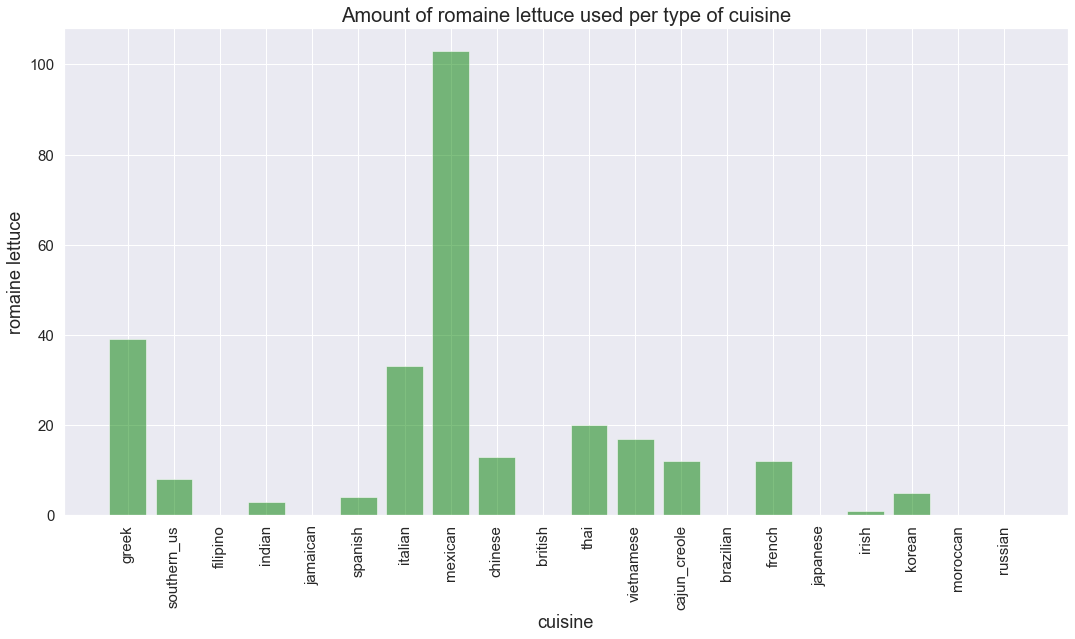

In [21]:
# Build the bar plot for romaine lettuce
fig, ax = plt.subplots(figsize = (15, 8))

ax.bar(cuisines, main_data['romaine lettuce'], align='center', alpha=0.5, color = 'green')
ax.set_xlabel('cuisine', fontsize = 18)
ax.set_ylabel('romaine lettuce', fontsize = 18)
ax.set_xticks(cuisines)
ax.set_xticklabels(cuisines)
ax.set_title('Amount of romaine lettuce used per type of cuisine', fontsize = 20)
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot.png')
plt.xticks(rotation = 90, fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

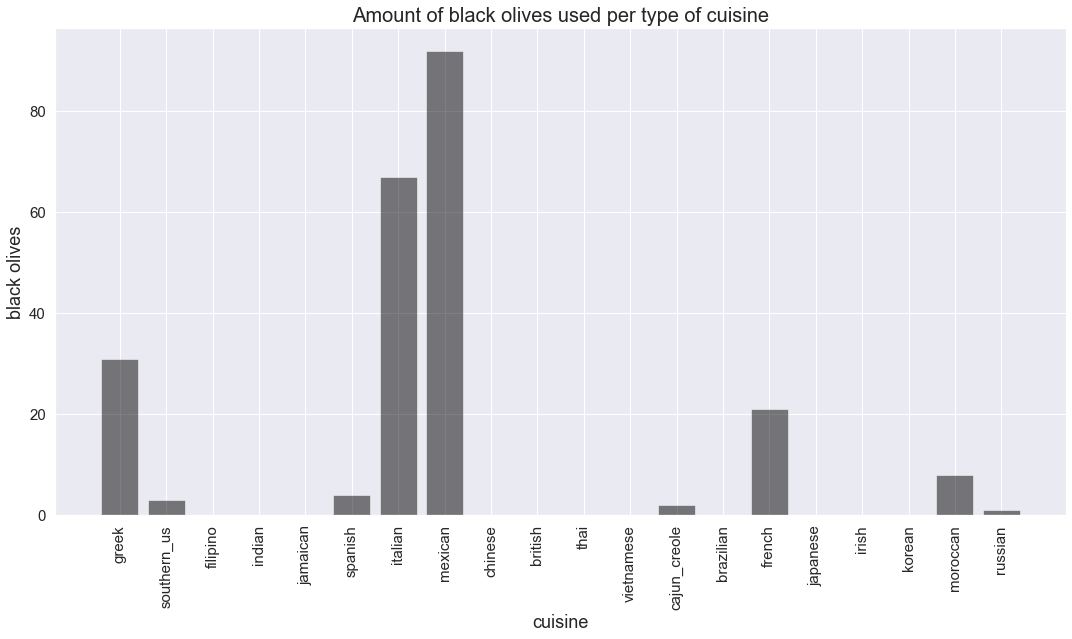

In [22]:
# Build the bar plot for black olives
fig, ax = plt.subplots(figsize = (15, 8))

ax.bar(cuisines, main_data['black olives'], align='center', alpha=0.5, color = 'black')
ax.set_xlabel('cuisine', fontsize = 18)
ax.set_ylabel('black olives', fontsize = 18)
ax.set_xticks(cuisines)
ax.set_xticklabels(cuisines)
ax.set_title('Amount of black olives used per type of cuisine', fontsize = 20)
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot.png')
plt.xticks(rotation = 90, fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

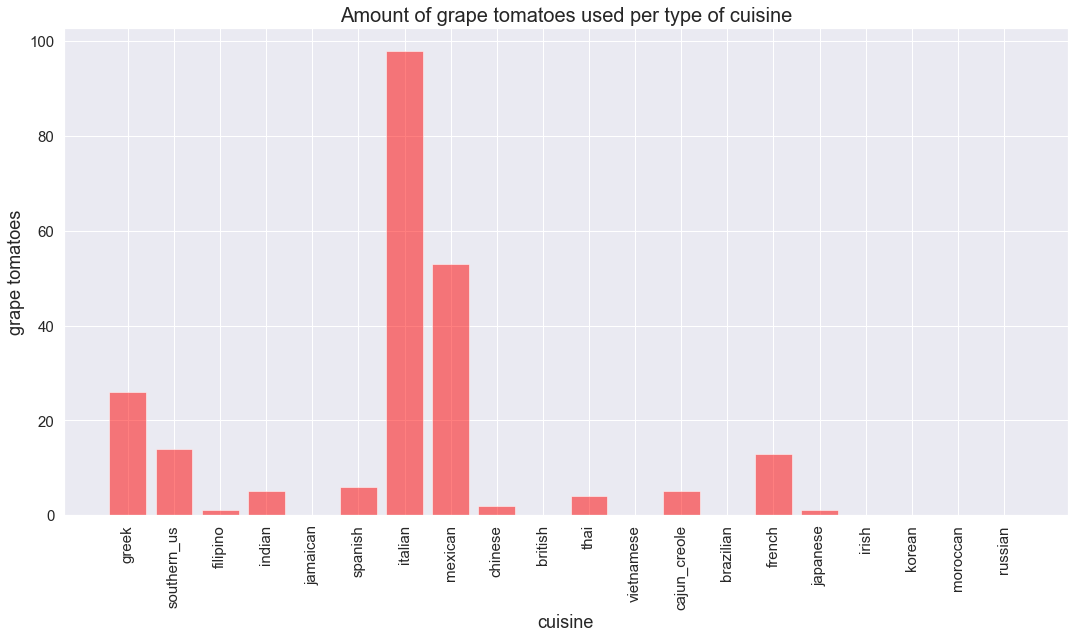

In [23]:
# Build the bar plot for grape tomatoes
fig, ax = plt.subplots(figsize = (15, 8))

ax.bar(cuisines, main_data['grape tomatoes'], align='center', alpha=0.5, color = 'red')
ax.set_xlabel('cuisine', fontsize = 18)
ax.set_ylabel('grape tomatoes', fontsize = 18)
ax.set_xticks(cuisines)
ax.set_xticklabels(cuisines)
ax.set_title('Amount of grape tomatoes used per type of cuisine', fontsize = 20)
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot.png')
plt.xticks(rotation = 90, fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

## What is the cuisine's ingredients shared percentage with other cuisine ingredients?

In [24]:
# To show the sum of each ingredient used in all the cuisines. Here we displayed three ingredients which are romaine lettuce, black olives and grape tomatoes
x = "romaine lettuce"
romainelettuce_sum = main_data[x].sum()
print('Total of all romaine lettuce of all cuisines\t:', romainelettuce_sum)

y = "black olives"
blackolives_sum = main_data[y].sum() 
print('Total of all black olives of all cuisines\t:', blackolives_sum)

z = "grape tomatoes"
grapetomatoes_sum = main_data[z].sum()
print('Total of all grape tomatoes of all cuisines\t:', grapetomatoes_sum)

Total of all romaine lettuce of all cuisines	: 270.0
Total of all black olives of all cuisines	: 229.0
Total of all grape tomatoes of all cuisines	: 228.0


### Romaine lettuce shared percentage

In [25]:
# Extract romaine lettuce column from the main_data dataframe
romainelettucecolumn = main_data[["cuisine","romaine lettuce"]]
romainelettucecolumn['percentage of romaine lettuce'] = romainelettucecolumn['romaine lettuce']/romainelettucecolumn['romaine lettuce'].sum()*100
print(romainelettucecolumn) # New dataframe for romaine lettuce

         cuisine  romaine lettuce  percentage of romaine lettuce
0          greek             39.0                      14.444444
1    southern_us              8.0                       2.962963
2       filipino              0.0                       0.000000
3         indian              3.0                       1.111111
4       jamaican              0.0                       0.000000
5        spanish              4.0                       1.481481
6        italian             33.0                      12.222222
7        mexican            103.0                      38.148148
8        chinese             13.0                       4.814815
9        british              0.0                       0.000000
10          thai             20.0                       7.407407
11    vietnamese             17.0                       6.296296
12  cajun_creole             12.0                       4.444444
13     brazilian              0.0                       0.000000
14        french         

<ipython-input-25-f06060ad8733>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  romainelettucecolumn['percentage of romaine lettuce'] = romainelettucecolumn['romaine lettuce']/romainelettucecolumn['romaine lettuce'].sum()*100


greek - 14.4%
southern_us - 2.9%
filipino - 0.0%
indian - 1.1%
jamaican - 0.0%
spanish - 1.4%
italian - 12.2%
mexican - 38.1%
chinese - 4.8%
british - 0.0%
thai - 7.4%
vietnamese - 6.2%
cajun_creole - 4.4%
brazilian - 0.0%
french - 4.4%
japanese - 0.0%
irish - 0.3%
korean - 1.8%
moroccan - 0.0%
russian - 0.0%


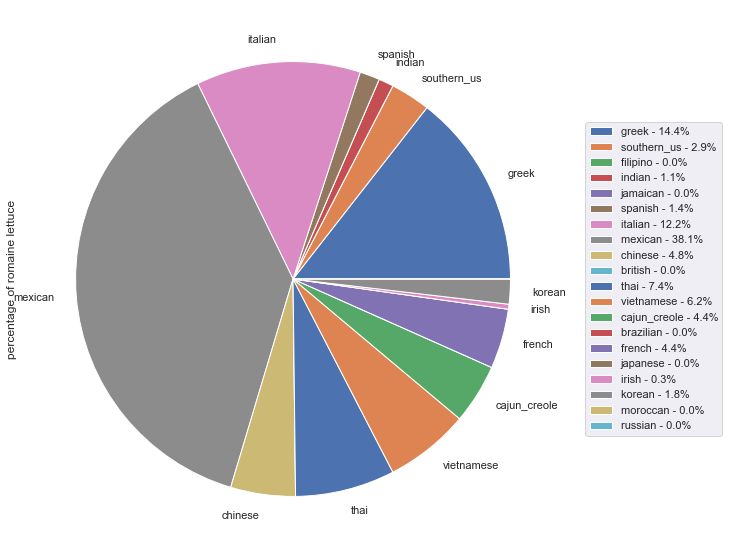

In [26]:
# To display a pie plot of the shared percentage of romaine lettuce among the 20 cuisines 
romainelettucecolumn.plot(y = 'percentage of romaine lettuce', figsize=(20,10), kind = 'pie', labels = cuisines)
customLegend = []
for i in range(len(romainelettucecolumn['percentage of romaine lettuce'])):
    desc = romainelettucecolumn['cuisine'][i] + ' - ' + str(math.floor(romainelettucecolumn['percentage of romaine lettuce'][i]*10)/10) + '%'
    print(desc)
    customLegend.append(desc)

plt.legend(customLegend, bbox_to_anchor=(1.3, 0.5), loc='center right')
plt.show()

### Black olives shared percentage

In [27]:
# Extract black olives column from the main_data dataframe
blackolivescolumn = main_data[["cuisine","black olives"]] 
blackolivescolumn['percentage of black olives'] = blackolivescolumn['black olives']/blackolivescolumn['black olives'].sum()*100
print(blackolivescolumn)  # New dataframe for black olives

         cuisine  black olives  percentage of black olives
0          greek          31.0                   13.537118
1    southern_us           3.0                    1.310044
2       filipino           0.0                    0.000000
3         indian           0.0                    0.000000
4       jamaican           0.0                    0.000000
5        spanish           4.0                    1.746725
6        italian          67.0                   29.257642
7        mexican          92.0                   40.174672
8        chinese           0.0                    0.000000
9        british           0.0                    0.000000
10          thai           0.0                    0.000000
11    vietnamese           0.0                    0.000000
12  cajun_creole           2.0                    0.873362
13     brazilian           0.0                    0.000000
14        french          21.0                    9.170306
15      japanese           0.0                    0.0000

<ipython-input-27-f05acad01160>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  blackolivescolumn['percentage of black olives'] = blackolivescolumn['black olives']/blackolivescolumn['black olives'].sum()*100


greek - 13.5%
southern_us - 1.3%
filipino - 0.0%
indian - 0.0%
jamaican - 0.0%
spanish - 1.7%
italian - 29.2%
mexican - 40.1%
chinese - 0.0%
british - 0.0%
thai - 0.0%
vietnamese - 0.0%
cajun_creole - 0.8%
brazilian - 0.0%
french - 9.1%
japanese - 0.0%
irish - 0.0%
korean - 0.0%
moroccan - 3.4%
russian - 0.4%


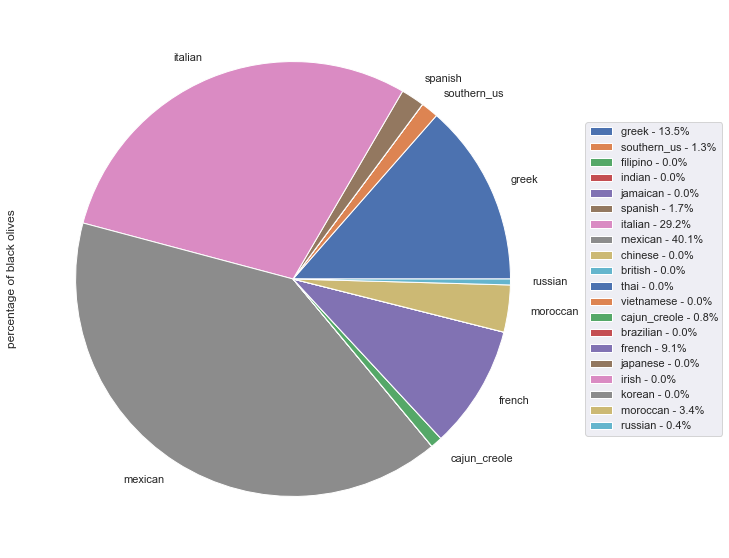

In [28]:
# To display a pie plot of the shared percentage of black olives among the 20 cuisines 
blackolivescolumn.plot(y= 'percentage of black olives', figsize=(45,10), kind = 'pie', labels = cuisines)
customLegend = []
for i in range(len(blackolivescolumn['percentage of black olives'])):
    desc = blackolivescolumn['cuisine'][i] + ' - ' + str(math.floor(blackolivescolumn['percentage of black olives'][i]*10)/10) + '%'
    print(desc)
    customLegend.append(desc)

plt.legend(customLegend,  bbox_to_anchor=(1.3, 0.5), loc='center right')
plt.show()

### Grape tomatoes shared percentage

In [29]:
# Extract grape tomatoes column from the main_data dataframe
grapetomatoescolumn = main_data[["cuisine","grape tomatoes"]] 
grapetomatoescolumn['percentage of grape tomatoes'] = grapetomatoescolumn['grape tomatoes']/grapetomatoescolumn['grape tomatoes'].sum()*100
print(grapetomatoescolumn)  # New dataframe for grape tomatoes

         cuisine  grape tomatoes  percentage of grape tomatoes
0          greek            26.0                     11.403509
1    southern_us            14.0                      6.140351
2       filipino             1.0                      0.438596
3         indian             5.0                      2.192982
4       jamaican             0.0                      0.000000
5        spanish             6.0                      2.631579
6        italian            98.0                     42.982456
7        mexican            53.0                     23.245614
8        chinese             2.0                      0.877193
9        british             0.0                      0.000000
10          thai             4.0                      1.754386
11    vietnamese             0.0                      0.000000
12  cajun_creole             5.0                      2.192982
13     brazilian             0.0                      0.000000
14        french            13.0                      5

<ipython-input-29-507c5d1413ed>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grapetomatoescolumn['percentage of grape tomatoes'] = grapetomatoescolumn['grape tomatoes']/grapetomatoescolumn['grape tomatoes'].sum()*100


greek - 11.4%
southern_us - 6.1%
filipino - 0.4%
indian - 2.1%
jamaican - 0.0%
spanish - 2.6%
italian - 42.9%
mexican - 23.2%
chinese - 0.8%
british - 0.0%
thai - 1.7%
vietnamese - 0.0%
cajun_creole - 2.1%
brazilian - 0.0%
french - 5.7%
japanese - 0.4%
irish - 0.0%
korean - 0.0%
moroccan - 0.0%
russian - 0.0%


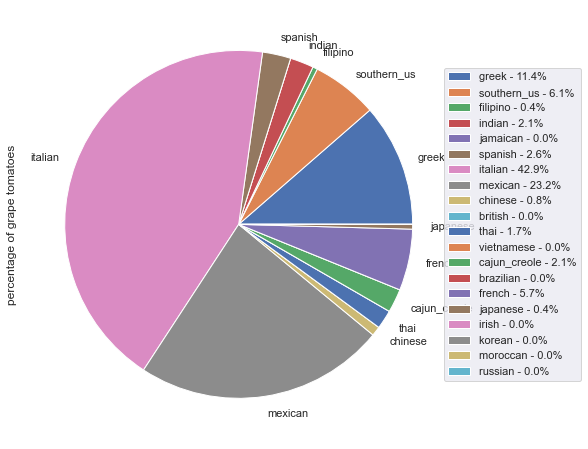

In [30]:
# To display a pie plot of the shared percentage of grape tomatoes among the 20 cuisines  
grapetomatoescolumn.plot(y= 'percentage of grape tomatoes', figsize=(45,8), kind = 'pie', labels = cuisines)
customLegend = []
for i in range(len(grapetomatoescolumn['percentage of grape tomatoes'])):
    desc = grapetomatoescolumn['cuisine'][i] + ' - ' + str(math.floor(grapetomatoescolumn['percentage of grape tomatoes'][i]*10)/10) + '%'
    print(desc)
    customLegend.append(desc)

plt.legend(customLegend,  bbox_to_anchor=(1.3, 0.5), loc='center right')
plt.show()

## Machine Learning

In [31]:
# Import libraries
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [32]:
# split the data: train and test
ingredients_data = train_data.drop(['id', 'cuisine','ingredients'],axis=1)
ingredients_data
cuisine_data = train_data['cuisine']
cuisine_data

# Random Train-Test-Split
seed = 7
testSize = 0.25
cuisine_train, cuisine_test= train_test_split(cuisine_data, test_size = testSize, random_state = seed)
ingredients_train, ingredients_test= train_test_split(ingredients_data, test_size = testSize, random_state = seed)

# Check the sample sizes
print("Train set : ", cuisine_train.shape)
print("Test set : ", cuisine_test.shape)

Train set :  (29830,)
Test set :  (9944,)


In [33]:
# train the model
model = XGBClassifier()
model.fit(ingredients_train, cuisine_train)

C:\Users\lrazerblade\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:20:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [34]:
# make predictions for test data
y_pred = model.predict(ingredients_test)
predictions = [value for value in y_pred]

In [35]:
# evaluate predictions
accuracy = accuracy_score(cuisine_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 75.41%


### What kind of cuisine is produced?
#### Try predicting the cuisines!
1. eggs, pepper, salt, mayonaise, cooking oil
2. romaine lettuce, black olives, grape tomatoes<br>

Run the codes below to test.

In [40]:
# Get unique set of ingredients from users
print("Enter your ingredients (key in 0 to stop)")
print("Ingredients should be in small letters.")
new_ingredients = list()
endkey = ""
while (endkey != '0'):
    item = input("ingredient: ")
    new_ingredients.append(item)
    endkey = item
new_ingredients.pop()    
user_ingredients = list(set(new_ingredients))
print("Your ingredients: " + str(user_ingredients))

Enter your ingredients (key in 0 to stop)
Ingredients should be in small letters.
ingredient: romaine lettuce
ingredient: black olives
ingredient: grape tomatoes
ingredient: 0
Your ingredients: ['grape tomatoes', 'romaine lettuce', 'black olives']


In [41]:
# prepare the dataset template for predicting
for e in ingredient_dict_count.keys():
    train_data[e] = np.zeros((train_data.shape[0], 1))
    # To create a new ingredient column with 0 as initial value
temp = pd.DataFrame(train_data.head(1).drop(['id', 'cuisine', 'ingredients'], axis=1))
temp

,romaine lettuce,black olives,grape tomatoes,garlic,pepper,purple onion,seasoning,garbanzo beans,feta cheese crumbles,plain flour,...,Oscar Mayer Cotto Salami,Challenge Butter,orange glaze,cholesterol free egg substitute,ciabatta loaf,Lipton® Iced Tea Brew Family Size Tea Bags,Hidden Valley® Greek Yogurt Original Ranch® Dip Mix,lop chong,tomato garlic pasta sauce,crushed cheese crackers
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
# populate template with user ingredients
user_temp = temp
for item in user_ingredients:
    if item in user_temp:
        user_temp[item] = 1
user_temp

,romaine lettuce,black olives,grape tomatoes,garlic,pepper,purple onion,seasoning,garbanzo beans,feta cheese crumbles,plain flour,...,Oscar Mayer Cotto Salami,Challenge Butter,orange glaze,cholesterol free egg substitute,ciabatta loaf,Lipton® Iced Tea Brew Family Size Tea Bags,Hidden Valley® Greek Yogurt Original Ranch® Dip Mix,lop chong,tomato garlic pasta sauce,crushed cheese crackers
0,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
# predict cuisine
user_pred = model.predict(user_temp)
predictions = [value for value in user_pred]
print(predictions)

['italian']
